In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark-palette')
sns.set_style("darkgrid")

## Reading Data from CSV File

In [2]:
df = pd.read_csv(r'data/ObesityDataSet_raw_and_data_sinthetic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [3]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [4]:
df['Target'] = df['NObeyesdad'].replace({
    'Overweight_Level_I': 'OW', 
    'Overweight_Level_II': 'OW',
    'Overweight_Level_III': 'OW',
    'Obesity_Type_I': 'OB',
    'Obesity_Type_II': 'OB',
    'Obesity_Type_III': 'OB',
    'Normal_Weight': 'NW',
    'Insufficient_Weight': 'IW'
})

In [5]:
df['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

Text(0, 0.5, 'Frequency Count')

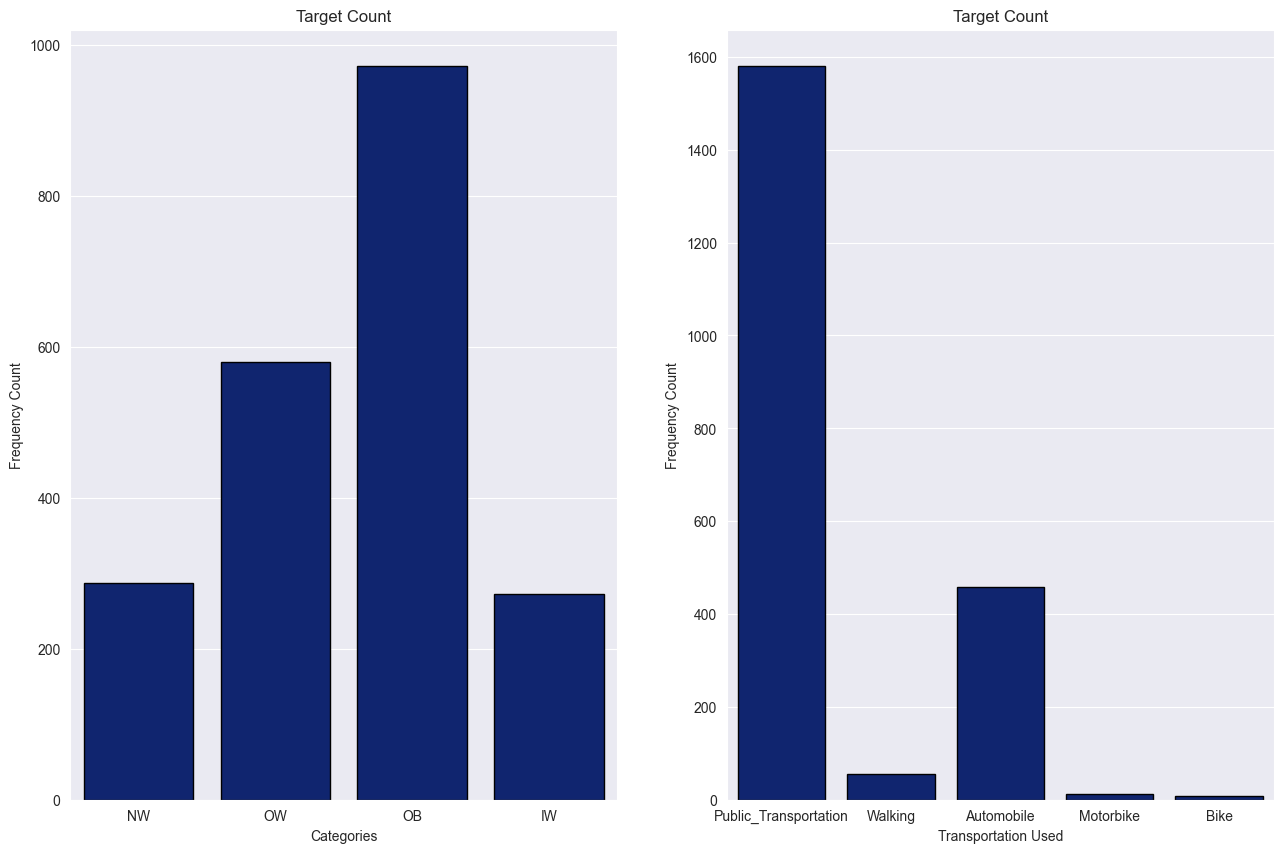

In [6]:
plt.figure(figsize=(24, 10))

plt.subplot(131)
plot = sns.countplot(x='Target', data=df, edgecolor='black')
plot.set_title("Target Count")
plot.set_xlabel("Categories")
plot.set_ylabel("Frequency Count")
plt.subplot(132)

plot = sns.countplot(x='MTRANS', data=df, edgecolor='black')
plot.set_title("Target Count")
plot.set_xlabel("Transportation Used")
plot.set_ylabel("Frequency Count")

Text(0, 0.5, 'Frequency Count')

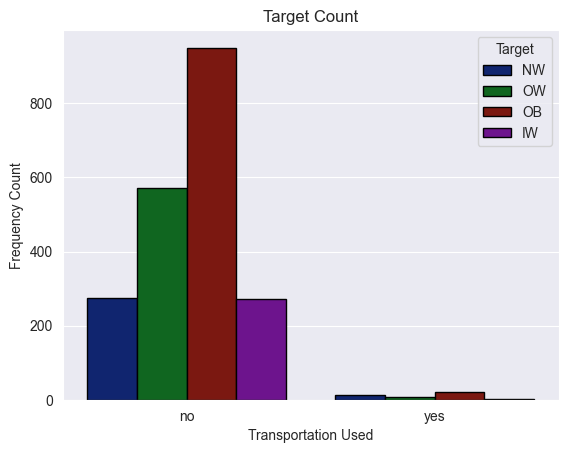

In [7]:
plot = sns.countplot(x='SMOKE', data=df, edgecolor='black', hue='Target')
plot.set_title("Target Count")
plot.set_xlabel("Transportation Used")
plot.set_ylabel("Frequency Count")

In [8]:
df = pd.get_dummies(
    df, 
    columns=[
        'Gender', 'CAEC', 'SMOKE', 'SCC', 'CALC', 
        'MTRANS', 'family_history_with_overweight',
        'FAVC'
    ], 
    prefix=['GENDER', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'FHO', 'FAVC'],
    dtype=np.int8
)

In [9]:
# Consistency in Coding
df.columns = df.columns.str.upper()

In [10]:
df_final = df.drop(axis=1, columns=['NOBEYESDAD'])

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_final[
    ['AGE', 'HEIGHT', 'WEIGHT']
] = scaler.fit_transform(df_final[['AGE', 'HEIGHT', 'WEIGHT']].values)

## Fitting Model After Scaling and Encoding of Data

In [12]:
X = df_final.drop(columns=['TARGET'])
y = df_final[['TARGET']]

### Test Train Split

We have to split the data into Train and Test Data in order to create and evaluate the model under consideration.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, train_size=0.8
)

In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=20000)
model.fit(X_train, y_train)

C:\Users\sahil.lodha\PycharmProjects\datascience_notebooks\env\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sahil.lodha\PycharmProjects\datascience_notebooks\env\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=20000, multi_class='multinomial')

In [39]:
X_train

,AGE,HEIGHT,WEIGHT,FCVC,NCP,CH2O,FAF,TUE,GENDER_FEMALE,GENDER_MALE,...,CALC_NO,MTRANS_AUTOMOBILE,MTRANS_BIKE,MTRANS_MOTORBIKE,MTRANS_PUBLIC_TRANSPORTATION,MTRANS_WALKING,FHO_NO,FHO_YES,FAVC_NO,FAVC_YES
162,-0.522124,-0.768388,-1.015318,3.000000,3.000000,2.000000,2.000000,0.000000,1,0,...,0,0,0,0,1,0,0,1,0,1
2001,-0.533953,0.545156,1.796170,3.000000,3.000000,2.887659,1.480919,0.779641,1,0,...,0,0,0,0,1,0,0,1,0,1
1435,-0.222692,-0.428400,-0.152388,1.203754,1.355354,2.765593,0.128342,1.659476,1,0,...,0,0,0,0,1,0,0,1,0,1
649,-0.390041,-1.218139,-1.617340,3.000000,1.696080,2.550307,1.098862,0.000000,1,0,...,1,0,0,0,1,0,1,0,1,0
1280,0.265136,1.178403,0.743025,3.000000,3.000000,2.858171,1.813318,0.680215,0,1,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1.257405,0.571152,1.279847,2.967300,3.000000,2.530035,0.955317,1.339232,0,1,...,0,1,0,0,0,0,0,1,0,1
1095,-0.206889,0.185497,-0.187745,2.000000,1.729553,1.400247,0.887923,1.011983,0,1,...,0,0,0,0,1,0,0,1,0,1
1130,-0.208489,-0.553986,-0.251521,2.000000,3.000000,2.000000,0.146919,2.000000,1,0,...,1,0,0,0,1,0,0,1,0,1
1294,-0.206889,-0.788028,-0.079743,2.058687,2.962004,2.010596,0.851059,0.630866,1,0,...,1,0,0,0,1,0,0,1,0,1


# Evaluating Model

In [40]:
from sklearn import metrics as mtx

In [41]:
y_predicted = model.predict(X_test)

<Axes: >

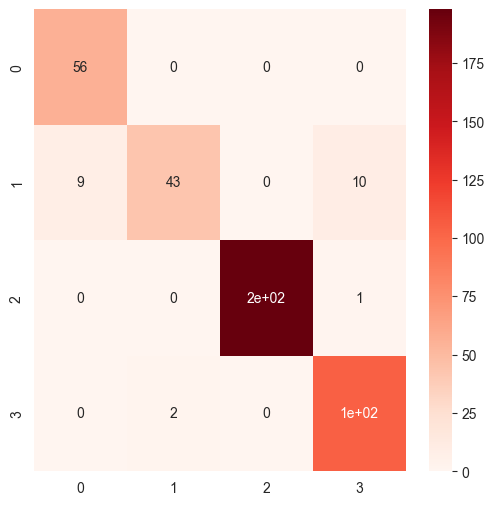

In [42]:
cm = mtx.confusion_matrix(y_test, y_predicted, labels=model.classes_)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap="Reds")

In [43]:
accuracy = mtx.accuracy_score(y_test, y_predicted)
recall = mtx.recall_score(y_test, y_predicted, average='macro')
precision = mtx.precision_score(y_test, y_predicted, average='macro')

In [46]:
accuracy

0.9479905437352246